In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec  7 09:33:52 2020

In [ ]:
@author: Akash Ghose
"""

ere I will spend a little time reading and exploring the data I've gathered<br>
 had to install the following packages:

In [ ]:
    #pandas-profiling
    #sweetviz

In [ ]:
"Goals"
    #Draw histograms
    #Draw boxplots
    #Draw barplots
    #Make WordCloud
    #Draw pivot_tables
    #What I'm really interested in is how the otehr variables interact with salary.
        #Which states have the highest salaries? Which locations?
        #How does rating correspond with it? descrpt_lenght?
    
    #Plot revenue vs salary vs job title?
        #Pivot table?
        #Plot revnue on one axis and salary on the other? Fit trend?
        #Color code plot points by jobtitle?
    #Pivot tables with salary and job title
    
    #convert catagorical data i.e size and revenue to numerical. --sklearns
    #Explore correlations graphically.
        #Remove outliers/normalize data
        
    #lm(seniority, job title, rating, sector, type of ownership)
    #Lasso regression
    #Kmeans to find outliers?
        #Cluster Dendrogams? Hierarchical clustering?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import sweetviz as sv

In [8]:
data = pd.read_csv('cleaned_data.csv')
#Setting console display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
data.columns


Index(['Job Title', 'simplified_title', 'seniority', 'Salary Estimate',
       'min_salary', 'max_salary', 'avg_salary', 'hourly',
       'employer_provided_salary', 'Job Description',
       ...
       'Sector_Manufacturing', 'Sector_Media', 'Sector_Mining & Metals',
       'Sector_Non-Profit', 'Sector_Oil, Gas, Energy & Utilities',
       'Sector_Real Estate', 'Sector_Retail', 'Sector_Telecommunications',
       'Sector_Transportation & Logistics', 'Sector_Travel & Tourism'],
      dtype='object', length=112)

In [11]:
description = data.describe()
description

,min_salary,max_salary,avg_salary,hourly,employer_provided_salary,description_length,contains_python,contains_R,contains_big_data,contains_MS,Rating,Founded,age,revenue_num,revenue_num_unknown,size_num,size_num_unknown,simplified_title_Data Analyst,simplified_title_Data Engineer,simplified_title_Data Scientist,simplified_title_Instructor,simplified_title_Machine Learning Engineer,simplified_title_Other,simplified_title_Other Analyst,simplified_title_Other Scientist,simplified_title_Research Analyst,simplified_title_Research Scientist,seniority_Junior,seniority_Mid-level,seniority_Senior,seniority_na,location_state_ AL,location_state_ AR,location_state_ AZ,location_state_ CA,location_state_ CO,location_state_ CT,location_state_ DC,location_state_ FL,location_state_ GA,location_state_ ID,location_state_ IL,location_state_ IN,location_state_ MA,location_state_ MD,location_state_ MI,location_state_ MN,location_state_ MO,location_state_ NC,location_state_ NH,location_state_ NJ,location_state_ NV,location_state_ NY,location_state_ OH,location_state_ OR,location_state_ PA,location_state_ RI,location_state_ SC,location_state_ TN,location_state_ TX,location_state_ UT,location_state_ VA,location_state_ WA,location_state_ WI,location_state_ WY,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_Subsidiary or Business Segment,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism
count,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000,27500.000000
mean,71.813891,117.908036,94.860964,0.000109,0.000182,4078.089818,0.618764,0.270145,0.547345,0.551345,3.700029,1829.326764,74.279564,8.189455,8.115273,5.271600,5.270727,0.002691,0.003200,0.820145,0.055309,0.059055,0.001309,0.000982,0.056873,0.000036,0.000400,0.000182,0.000327,0.006145,0.993345,0.000945,0.000036,0.058218,0.121055,0.000800,0.001309,0.050618,0.053091,0.000873,0.000073,0.053600,0.000291,0.003273,0.159782,0.056073,0.000473,0.000618,0.055818,0.000036,0.056073,0.000036,0.054509,0.001636,0.00014

profile = ProfileReport(data,title='Your EDA Report')<br>
profile.to_file("EDA_profile_report.html")

report_sweetviz = sv.analyze(data)<br>
report_sweetviz.show_html()

avg salary across all entries

In [28]:
data.avg_salary.mean()
pd.Series(data.columns)
data.dtypes


Job Title                                            object
simplified_title                                     object
seniority                                            object
Salary Estimate                                      object
min_salary                                            int64
max_salary                                            int64
avg_salary                                          float64
hourly                                                int64
employer_provided_salary                              int64
Job Description                                      object
description_length                                    int64
contains_python                                       int64
contains_R                                            int64
contains_big_data                                     int64
contains_MS                                           int64
Rating                                              float64
Company Name                            

Seperating the data out into continuous and discrete variables

In [12]:
df = data[['avg_salary', 'description_length', 'Rating', 'age',
           'simplified_title','seniority', 'hourly', 'employer_provided_salary',
           'contains_python','contains_R', 'contains_big_data', 'contains_MS',
           'Location', 'location_state', 'Size', 'age', 'Type of ownership',
           'Industry', 'Sector', 'Revenue']]
df_continuous = data[['avg_salary', 'description_length', 'Rating', 'age']]
df_discrete = data[['simplified_title','seniority', 'hourly', 
                        'employer_provided_salary', 'contains_python',
                        'contains_R', 'contains_big_data', 'contains_MS',
                        'Location', 'location_state', 'Size', 
                        'Type of ownership', 'Industry', 'Sector', 'Revenue']]

title vs salary

In [13]:
table_00 = (pd.pivot_table(data, index=['simplified_title'], 
                        values= ['avg_salary']).
            sort_values(by='avg_salary', ascending=False))

In [14]:
table_00

,avg_salary
simplified_title,
Instructor,158.500000
Research Analyst,130.000000
Data Engineer,99.960227
Data Scientist,95.385940
Other,91.472222
Machine Learning Engineer,76.104988
Data Analyst,72.844595
Other Analyst,66.166667
Research Scientist,65.227273


[title and seniority] vs salary

In [15]:
table_01 = (pd.pivot_table(data, index=['simplified_title', 'seniority'], 
                        values= ['avg_salary']))
table_01

avg_salary
simplified_title          seniority            
Data Analyst              Senior      75.362500
                          na          69.882353
Data Engineer             Senior     105.625000
                          na          98.294118
Data Scientist            Junior      87.000000
                          Mid-level  106.666667
                          Senior     126.024194
                          na          95.298412
Instructor                na         158.500000
Machine Learning Engineer Senior     158.500000
                          na          76.003391
Other                     Senior      75.866667
                          na         102.619048
Other Analyst             Senior      73.166667
                          na          65.291667
Other Scientist           Senior      82.320000
                          na          45.807018
Research Analyst          na         130.000000
Research Scientist        Junior      35.000000
                          Senior      82.250000
                          na          64.750000

[title and revenue] vs salary

In [19]:
table_02 = (pd.pivot_table(data, values='avg_salary', 
                           index=['simplified_title', 'Revenue', 'revenue_num']))
table_02

avg_salary
simplified_title          Revenue                          revenue_num            
Data Analyst              $1 to $2 billion (USD)           9             94.250000
                          $10 to $25 million (USD)         4             90.200000
                          $10+ billion (USD)               12            88.000000
                          $100 to $500 million (USD)       7             64.656250
                          $2 to $5 billion (USD)           10            74.441176
                          $25 to $50 million (USD)         5             50.500000
                          $5 to $10 billion (USD)          11            43.000000
                          $50 to $100 million (USD)        6             70.444444
                          $500 million to $1 billion (USD) 8             56.250000
                          Unknown / Non-Applicable         8             75.526316
Data Engineer             $10 to $25 million (USD)         4             72.500000
                          $10+ billion (USD)               12            89.916667
                          $100 to $500 million (USD)       7            108.404762
                          $2 to $5 billion (USD)           10           105.818182
                          $25 to $50 million (USD)         5            102.166667
                          $5 to $10 million (USD)          3             93.500000
                          $50 to $100 million (USD)        6             93.750000
                          $500 million to $1 billion (USD) 8            108.052632
                          Unknown / Non-Applicable         8             73.636364
Data Scientist            $1 to $2 billion (USD)           9            118.493863
                          $1 to $5 million (USD)           2             86.125000
                          $10 to $25 million (USD)         4             95.280488
                          $10+ billion (USD)               12           108.754930
                          $100 to $500 million (USD)       7            103.876740
                          $2 to $5 billion (USD)           10            68.112860
                          $25 to $50 million (USD)         5             87.698973
                          $5 to $10 billion (USD)          11            80.370934
                          $5 to $10 million (USD)          3             99.937500
                          $50 to $100 million (USD)        6             75.533535
                          $500 million to $1 billion (USD) 8             85.277349
                          Less than $1 million (USD)       1             98.175521
                          Unknown / Non-Applicable         8            116.840000
Instructor                $100 to $500 million (USD)       7            158.500000
Machine Learning Engineer $1 to $2 billion (USD)           9            140.250000
                          $10 to $25 million (USD)         4             92.500000
                          $10+ billion (USD)               12           120.000000
                          $100 to $500 million (USD)       7            136.500000
                          $2 to $5 billion (USD)           10            83.500000
                          $50 to $100 million (USD)        6             75.500000
                          $500 million to $1 billion (USD) 8            111.000000
                          Unknown / Non-Applicable         8            111.500000
Other                     $10+ billion (USD)               12           102.000000
                          $100 to $500 million (USD)       7            115.500000
                          $2 to $5 billion (USD)           10            79.500000
                          $50 to $100 million (USD)        6             84.000000
                          Unknown / Non-Applicable         8             81.968750
Other Analyst             $1 to $2 billion (USD)           9             86.500000
     

Plot revnue on one axis and salary on the other

C:\Users\asgho\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\asgho\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\asgho\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\asgho\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']
C:\Users\asgho\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1195: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
C:\Users\asgho\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1196: RuntimeWarning: invalid value encountered in double_scala

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12')]

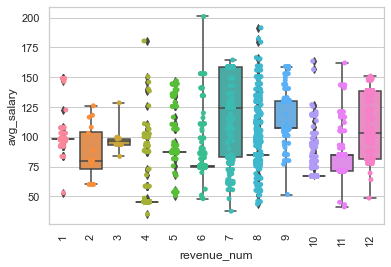

In [22]:
sns.set_theme(style="whitegrid")
# ax = sns.violinplot(x="Revenue", y="avg_salary", data=data,
 #                   inner=None, color=".8")
ax = sns.stripplot(x="revenue_num", y="avg_salary", data=data)
ax = sns.boxplot(x="revenue_num", y="avg_salary", data=data, whis=np.inf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Correlations

<AxesSubplot:>

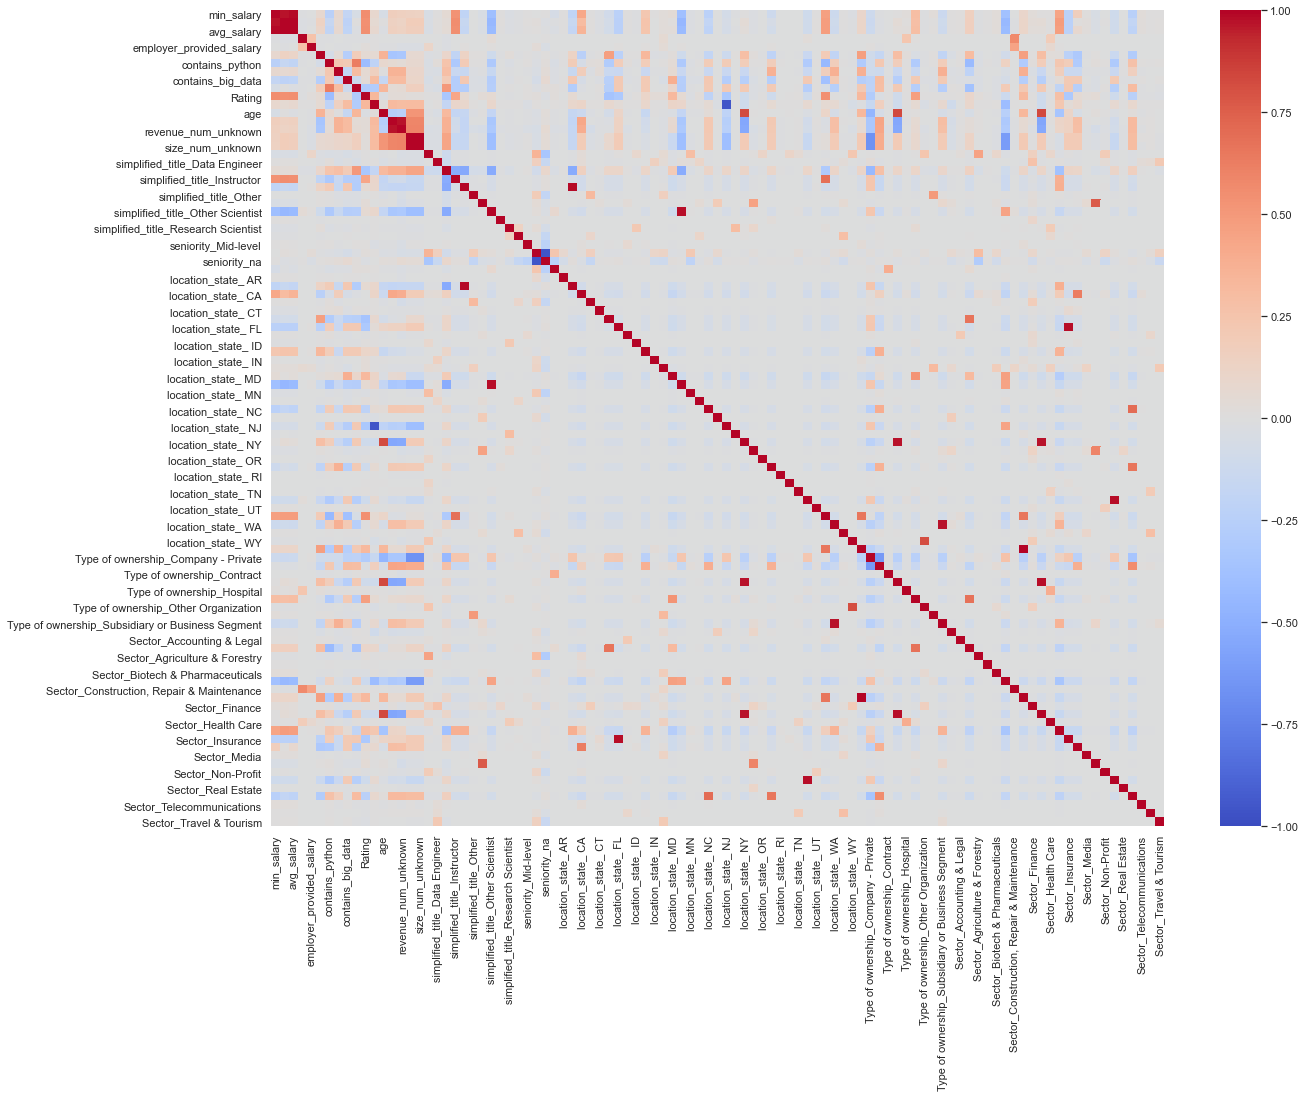

In [26]:
df_corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,
            vmin=-1,
            cmap='coolwarm')

In [ ]:
df.plot.scatter(x='Rating', y='avg_salary')

In [ ]:
df.plot.scatter(x='age', y='description_length')